## Ananya Agrawal (ananyaa2)

### add imports

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import Dataset, DataLoader
from typing import Optional, List, Tuple, Dict
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

### load datasets

In [2]:
data_xtrain = pd.read_csv("data/X_train.csv")

In [3]:
data_xtrain.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan1,...,VSA_EState4,VSA_EState5,VSA_EState6,FractionCSP3,HeavyAtomCount,NOCount,NumHeteroatoms,NumRotatableBonds,MolLogP,MolMR
0,12.027617,-0.601944,12.027617,0.094308,0.492686,257.289,242.169,257.105193,98.0,1.157895,...,7.728881,-0.268646,9.919170,0.133333,19.0,4.0,4.0,2.0,2.81044,73.3937
1,12.062526,-0.884699,12.062526,0.135969,0.326395,255.314,234.146,255.147058,102.0,1.444444,...,-0.237965,-1.531638,0.000000,0.769231,18.0,5.0,5.0,5.0,2.08980,67.2540
2,11.772198,-0.585578,11.772198,0.116966,0.649411,303.314,286.178,303.110673,116.0,1.227273,...,0.179580,-0.972265,7.459773,0.250000,22.0,6.0,6.0,5.0,1.81502,80.1101
3,12.755524,-4.007589,12.755524,0.057683,0.420632,372.454,352.294,372.136845,136.0,1.307692,...,2.147210,-0.145501,8.999193,0.235294,26.0,8.0,9.0,5.0,2.24700,100.3399
4,11.784613,-0.906944,11.784613,0.045270,0.666884,279.679,269.599,279.029835,98.0,1.526316,...,-0.825674,-1.333353,4.532603,0.076923,19.0,5.0,6.0,3.0,2.22990,71.7230


In [4]:
data_xtest = pd.read_csv("data/X_test.csv")

In [5]:
data_xtest.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan1,...,VSA_EState4,VSA_EState5,VSA_EState6,FractionCSP3,HeavyAtomCount,NOCount,NumHeteroatoms,NumRotatableBonds,MolLogP,MolMR
0,10.422062,-0.579482,10.422062,0.280649,0.610518,245.238,234.150,245.080041,92.0,1.333333,...,1.056284,0.646315,2.829125,0.166667,18.0,6.0,6.0,4.0,2.71060,65.7004
1,12.851273,-0.111118,12.851273,0.093870,0.654267,377.444,354.260,377.173942,144.0,1.214286,...,4.210526,0.396102,10.036751,0.318182,28.0,6.0,6.0,3.0,3.61342,106.0830
2,14.043689,-4.024534,14.043689,0.054957,0.185128,713.901,666.525,713.324705,270.0,0.960784,...,2.597705,-1.260978,24.367952,0.410256,51.0,11.0,12.0,11.0,3.20880,195.0548
3,11.358555,-0.606578,11.358555,0.126557,0.766307,291.347,270.179,291.147058,114.0,1.428571,...,0.533999,0.712952,7.454574,0.437500,21.0,5.0,5.0,7.0,2.37310,80.8590
4,12.288429,-4.357947,12.288429,0.062917,0.576842,218.178,209.106,218.066698,82.0,1.400000,...,-0.327570,0.000000,4.798847,0.333333,15.0,3.0,6.0,3.0,2.81860,48.7060


In [6]:
data_ytrain = pd.read_csv("data/y_train.csv")

In [7]:
data_ytrain.head()

,Kow
0,1
1,1
2,0
3,0
4,1


In [8]:
data_ytest = pd.read_csv("data/y_test.csv")

In [9]:
data_ytest.head()

,Kow
0,0
1,1
2,1
3,1
4,0


In [10]:
print(data_xtrain.shape)
print(data_xtest.shape)
print(data_ytrain.shape)
print(data_ytest.shape)

(1500, 60)
(200, 60)
(1500, 1)
(200, 1)


## nn.py (scratch implementation)

Train shape: 1500 60
Test shape: 200 60
Epoch 1/500: Train Loss: 0.6933, Train Acc: 0.4623 | Test Loss: 0.6933, Test Acc: 0.4414


/var/folders/nr/8qbxkfps4xgblznwl9hs6yjc0000gn/T/ipykernel_84691/3012894420.py:286: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x_np, dtype=torch.float64, device=device).T
/var/folders/nr/8qbxkfps4xgblznwl9hs6yjc0000gn/T/ipykernel_84691/3012894420.py:320: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x_np, dtype=torch.float64, device=device).T


Epoch 50/500: Train Loss: 0.6755, Train Acc: 0.6958 | Test Loss: 0.6672, Test Acc: 0.6953
Epoch 100/500: Train Loss: 0.5570, Train Acc: 0.7712 | Test Loss: 0.5227, Test Acc: 0.7969
Epoch 150/500: Train Loss: 0.4576, Train Acc: 0.8067 | Test Loss: 0.4310, Test Acc: 0.8242
Epoch 200/500: Train Loss: 0.4096, Train Acc: 0.8220 | Test Loss: 0.4012, Test Acc: 0.7852
Epoch 250/500: Train Loss: 0.3824, Train Acc: 0.8384 | Test Loss: 0.3823, Test Acc: 0.7930
Epoch 300/500: Train Loss: 0.3606, Train Acc: 0.8469 | Test Loss: 0.3728, Test Acc: 0.7969
Epoch 350/500: Train Loss: 0.3478, Train Acc: 0.8588 | Test Loss: 0.3622, Test Acc: 0.8047
Epoch 400/500: Train Loss: 0.3372, Train Acc: 0.8580 | Test Loss: 0.3551, Test Acc: 0.8359
Epoch 450/500: Train Loss: 0.3303, Train Acc: 0.8666 | Test Loss: 0.3497, Test Acc: 0.8359
Epoch 500/500: Train Loss: 0.3225, Train Acc: 0.8692 | Test Loss: 0.3473, Test Acc: 0.8281


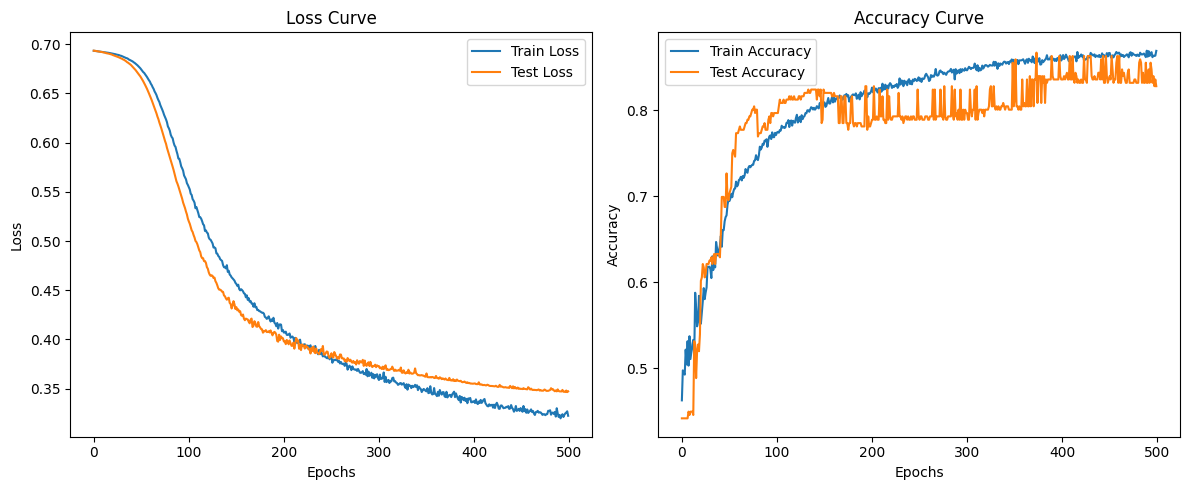

In [11]:
"""
You will need to implement a single layer neural network from scratch.

IMPORTANT: DO NOT change any function signatures
"""


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


class Transform(object):
    """
    This is the base class. You do not need to change anything.
    Read the comments in this class carefully.
    """
    def __init__(self):
        """
        Initialize any parameters
        """
        pass

    def forward(self, x):
        """
        x should be passed as column vectors
        """
        pass

    def backward(self, grad_wrt_out):
        """
        Compute and save the gradients wrt the parameters for step()
        Return grad_wrt_x which will be the grad_wrt_out for previous Transform
        """
        pass

    def step(self):
        """
        Apply gradients to update the parameters
        """
        pass

    def zerograd(self):
        """
        This is used to Reset the gradients.
        Usually called before backward()
        """
        pass


class ReLU(Transform):
    def __init__(self):
        super(ReLU, self).__init__()
        self.x = None

    def forward(self, x):
        """
        x shape (indim, batch_size)
        return shape (indim, batch_size)
        """
        self.x = x
        return torch.maximum(x, torch.zeros_like(x))

    def backward(self, grad_wrt_out):
        """
        grad_wrt_out shape (outdim, batch_size)
        """
        # Only pass gradients through where x > 0
        grad = grad_wrt_out.clone()
        grad[self.x <= 0] = 0
        return grad

    def step(self):
        # No parameters to update in ReLU.
        pass

    def zerograd(self):
        pass


class LinearMap(Transform):
    def __init__(self, indim, outdim, lr=0.01):
        """
        indim: input dimension
        outdim: output dimension
        lr: learning rate
        """
        super(LinearMap, self).__init__()
        # Initialize weights and bias with small random numbers.
        self.weights = 0.01 * torch.rand((outdim, indim), dtype=torch.float64, device=device)
        self.bias = 0.01 * torch.rand((outdim, 1), dtype=torch.float64, device=device)
        self.lr = lr
        self.x = None
        self.grad_weights = None
        self.grad_bias = None

    def forward(self, x):
        """
        x shape (indim, batch_size)
        return shape (outdim, batch_size)
        """
        self.x = x  # Save input for backward pass.
        return self.weights @ x + self.bias  # bias is broadcasted across the batch

    def backward(self, grad_wrt_out):
        """
        grad_wrt_out shape (outdim, batch_size)
        return shape (indim, batch_size)
        """
        # Compute gradients for parameters.
        self.grad_weights = grad_wrt_out @ self.x.T  # (outdim, batch_size) x (batch_size, indim)
        self.grad_bias = torch.sum(grad_wrt_out, dim=1, keepdim=True)  # Sum over batch dimension
        # Compute gradient with respect to input x.
        grad_input = self.weights.T @ grad_wrt_out  # (indim, outdim) x (outdim, batch_size)
        return grad_input

    def step(self):
        """
        apply gradients calculated by backward() to update the parameters
        """
        with torch.no_grad():
            self.weights -= self.lr * self.grad_weights
            self.bias -= self.lr * self.grad_bias

    def zerograd(self):
        """
        Reset gradients.
        """
        self.grad_weights = torch.zeros_like(self.weights)
        self.grad_bias = torch.zeros_like(self.bias)


class SoftmaxCrossEntropyLoss(object):
    def __init__(self):
        self.p = None
        self.labels = None
        self.batch_size = None

    def forward(self, logits, labels):
        """
        logits are pre-softmax scores, labels are one-hot labels of given inputs
        logits and labels are in the shape of (num_classes, batch_size)
        returns loss as a scalar (i.e. mean value of the batch_size loss)
        """
        # For numerical stability subtract the max from logits.
        logits_stable = logits - torch.max(logits, dim=0, keepdim=True).values
        exp_logits = torch.exp(logits_stable)
        sum_exp = torch.sum(exp_logits, dim=0, keepdim=True)
        self.p = exp_logits / sum_exp  # softmax probabilities
        self.labels = labels
        self.batch_size = logits.shape[1]
        # Compute cross entropy loss; add a small constant to avoid log(0)
        loss = -torch.sum(labels * torch.log(self.p + 1e-12)) / self.batch_size
        return loss

    def backward(self):
        """
        return grad_wrt_logits shape (num_classes, batch_size)
        (don't forget to divide by batch_size because your loss is a mean)
        """
        grad_logits = (self.p - self.labels) / self.batch_size
        return grad_logits
    
    def getAccu(self):
        """
        return accuracy here
        """
        preds = torch.argmax(self.p, dim=0)
        targets = torch.argmax(self.labels, dim=0)
        correct = torch.sum(preds == targets).item()
        accuracy = correct / self.batch_size
        return accuracy


class SingleLayerMLP(Transform):
    """constructing a single layer neural network with the previous functions"""
    def __init__(self, indim, outdim, hidden_layer=100, lr=0.01):
        super(SingleLayerMLP, self).__init__()
        self.linear1 = LinearMap(indim, hidden_layer, lr)
        self.relu = ReLU()
        self.linear2 = LinearMap(hidden_layer, outdim, lr)

    def forward(self, x):
        """
        x shape (indim, batch_size)
        return the presoftmax logits shape (outdim, batch_size)
        """
        out1 = self.linear1.forward(x)          # Linear transformation: (hidden_layer, batch_size)
        out_relu = self.relu.forward(out1)        # ReLU activation
        logits = self.linear2.forward(out_relu)   # Output logits: (outdim, batch_size)
        return logits

    def backward(self, grad_wrt_out):
        """
        grad_wrt_out shape (outdim, batch_size)
        calculate the gradients wrt the parameters
        """
        grad_linear2 = self.linear2.backward(grad_wrt_out)
        grad_relu = self.relu.backward(grad_linear2)
        grad_linear1 = self.linear1.backward(grad_relu)
        return grad_linear1

    def step(self):
        """update model parameters"""
        self.linear1.step()
        self.linear2.step()

    def zerograd(self):
        self.linear1.zerograd()
        self.linear2.zerograd()


class DS(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray):
        self.length = len(X)
        self.X = X
        self.Y = Y

    def __getitem__(self, idx):
        x = self.X[idx, :]
        y = self.Y[idx]
        return (x, y)

    def __len__(self):
        return self.length

def labels2onehot(labels: np.ndarray):
    return np.array([[i == lab for i in range(2)] for lab in labels]).astype(int)


if __name__ == "__main__":
    """The dataset loaders were provided for you.
    You need to implement your own training process.
    You need plot the loss and accuracies during the training process and test process. 
    """

    indim = 60
    outdim = 2
    hidden_dim = 100
    lr = 0.01
    batch_size = 64
    epochs = 500

    # Load training dataset.
    Xtrain = pd.read_csv("./data/X_train.csv")
    Ytrain = pd.read_csv("./data/y_train.csv")
    scaler = MinMaxScaler()
    Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain), columns=Xtrain.columns).to_numpy()
    Ytrain = np.squeeze(Ytrain.to_numpy())
    m1, n1 = Xtrain.shape
    print("Train shape:", m1, n1)
    train_ds = DS(Xtrain, Ytrain)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    # Load testing dataset.
    Xtest = pd.read_csv("./data/X_test.csv")
    Ytest = pd.read_csv("./data/y_test.csv")
    Xtest = pd.DataFrame(scaler.fit_transform(Xtest), columns=Xtest.columns).to_numpy()
    Ytest = np.squeeze(Ytest.to_numpy())
    m2, n2 = Xtest.shape
    print("Test shape:", m2, n2)
    test_ds = DS(Xtest, Ytest)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

    # Construct the model and loss function.
    model = SingleLayerMLP(indim, outdim, hidden_layer=hidden_dim, lr=lr)
    criterion = SoftmaxCrossEntropyLoss()

    # Lists to store loss and accuracy values.
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    # Training process.
    for epoch in range(epochs):
        model.zerograd()  # Reset gradients at start of epoch
        epoch_loss = 0.0
        epoch_acc = 0.0
        num_batches = 0

        for batch in train_loader:
            x_np, y_np = batch  # x_np shape: (batch_size, indim), y_np shape: (batch_size,)
            # Convert inputs to torch tensors and transpose to match (indim, batch_size)
            x = torch.tensor(x_np, dtype=torch.float64, device=device).T
            # Convert labels to one-hot vectors and transpose to (num_classes, batch_size)
            y_onehot = torch.tensor(labels2onehot(np.array(y_np)), dtype=torch.float64, device=device).T

            # Forward pass.
            logits = model.forward(x)
            loss = criterion.forward(logits, y_onehot)

            # Backward pass.
            grad_loss = criterion.backward()
            model.backward(grad_loss)

            # Update parameters.
            model.step()
            model.zerograd()  # Reset gradients for next iteration

            epoch_loss += loss.item()
            epoch_acc += criterion.getAccu()
            num_batches += 1

        # Average training loss and accuracy for the epoch.
        avg_train_loss = epoch_loss / num_batches
        avg_train_acc = epoch_acc / num_batches
        train_losses.append(avg_train_loss)
        train_accuracies.append(avg_train_acc)

        # Evaluate on test data.
        model.zerograd()
        test_loss_epoch = 0.0
        test_acc_epoch = 0.0
        test_batches = 0
        # In evaluation, we don't update parameters.
        for batch in test_loader:
            x_np, y_np = batch
            x = torch.tensor(x_np, dtype=torch.float64, device=device).T
            y_onehot = torch.tensor(labels2onehot(np.array(y_np)), dtype=torch.float64, device=device).T

            logits = model.forward(x)
            loss = criterion.forward(logits, y_onehot)
            test_loss_epoch += loss.item()
            test_acc_epoch += criterion.getAccu()
            test_batches += 1

        avg_test_loss = test_loss_epoch / test_batches
        avg_test_acc = test_acc_epoch / test_batches
        test_losses.append(avg_test_loss)
        test_accuracies.append(avg_test_acc)

        if (epoch + 1) % 50 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}: Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f} | Test Loss: {avg_test_loss:.4f}, Test Acc: {avg_test_acc:.4f}")

    # Plotting loss and accuracy curves.
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(test_accuracies, label="Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.legend()

    plt.tight_layout()
    plt.show()

## reference.py (pytorch implementation)

Train shape: 1500 60
Test shape: 200 60


/var/folders/nr/8qbxkfps4xgblznwl9hs6yjc0000gn/T/ipykernel_84691/1617852850.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x_np, dtype=torch.float32, device=device)
/var/folders/nr/8qbxkfps4xgblznwl9hs6yjc0000gn/T/ipykernel_84691/1617852850.py:142: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y_np, dtype=torch.long, device=device)
/var/folders/nr/8qbxkfps4xgblznwl9hs6yjc0000gn/T/ipykernel_84691/1617852850.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x_np, dtype=torch.float

Epoch 1/500: Train Loss: 0.6881, Train Acc: 0.5027 | Test Loss: 0.6817, Test Acc: 0.5350
Epoch 50/500: Train Loss: 0.5073, Train Acc: 0.7907 | Test Loss: 0.4834, Test Acc: 0.8050
Epoch 100/500: Train Loss: 0.4223, Train Acc: 0.8167 | Test Loss: 0.4012, Test Acc: 0.8250
Epoch 150/500: Train Loss: 0.3871, Train Acc: 0.8273 | Test Loss: 0.3728, Test Acc: 0.8250
Epoch 200/500: Train Loss: 0.3647, Train Acc: 0.8400 | Test Loss: 0.3538, Test Acc: 0.8450
Epoch 250/500: Train Loss: 0.3478, Train Acc: 0.8527 | Test Loss: 0.3413, Test Acc: 0.8500
Epoch 300/500: Train Loss: 0.3358, Train Acc: 0.8613 | Test Loss: 0.3322, Test Acc: 0.8550
Epoch 350/500: Train Loss: 0.3259, Train Acc: 0.8633 | Test Loss: 0.3256, Test Acc: 0.8650
Epoch 400/500: Train Loss: 0.3188, Train Acc: 0.8653 | Test Loss: 0.3208, Test Acc: 0.8650
Epoch 450/500: Train Loss: 0.3117, Train Acc: 0.8693 | Test Loss: 0.3168, Test Acc: 0.8700
Epoch 500/500: Train Loss: 0.3067, Train Acc: 0.8673 | Test Loss: 0.3132, Test Acc: 0.8700


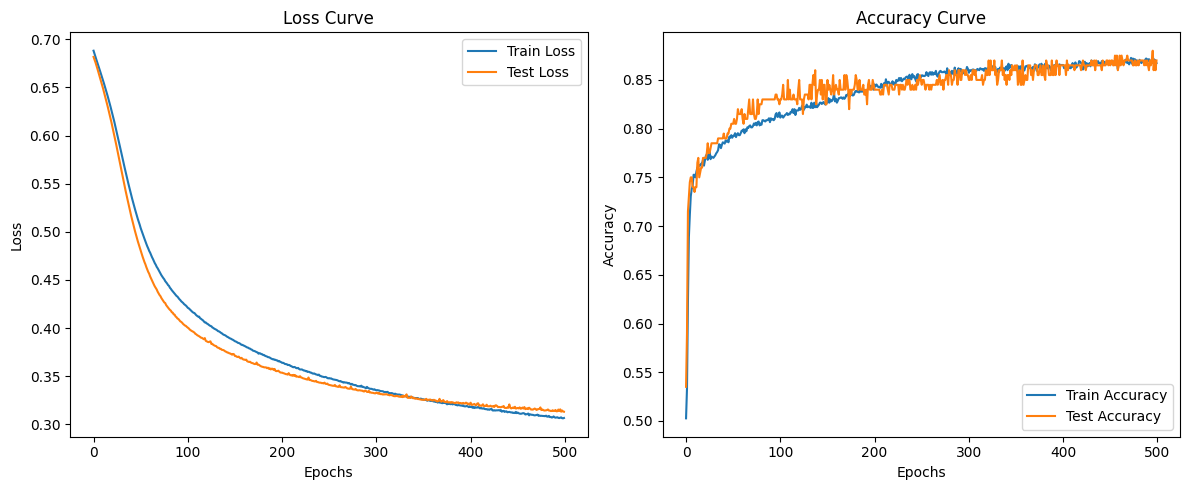

In [ ]:
"""
You will need to validate your NN implementation using PyTorch. You can use any PyTorch functional or modules in this code.

IMPORTANT: DO NOT change any function signatures
"""

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


class SingleLayerMLP(nn.Module):
    """constructing a single layer neural network with PyTorch"""
    def __init__(self, indim, outdim, hidden_layer=100):
        super(SingleLayerMLP, self).__init__()
        # First linear layer: from input dimension to hidden layer.
        self.linear1 = nn.Linear(indim, hidden_layer)
        # Activation function.
        self.relu = nn.ReLU()
        # Second linear layer: from hidden layer to output dimension.
        self.linear2 = nn.Linear(hidden_layer, outdim)

    def forward(self, x):
        """
        x shape (batch_size, indim)
        """
        out = self.linear1(x)   # (batch_size, hidden_layer)
        out = self.relu(out)
        out = self.linear2(out) # (batch_size, outdim)
        return out


class DS(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray):
        self.length = len(X)
        self.X = X
        self.Y = Y

    def __getitem__(self, idx):
        x = self.X[idx, :]
        y = self.Y[idx]
        return (x, y)

    def __len__(self):
        return self.length


def validate(loader, model, criterion):
    """takes in a dataloader, then returns the model loss and accuracy on this loader"""
    model.eval()
    total_loss = 0.0
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for batch in loader:
            x_np, y_np = batch
            # Convert data to tensors.
            x = torch.tensor(x_np, dtype=torch.float32, device=device)
            y = torch.tensor(y_np, dtype=torch.long, device=device)
            outputs = model(x)  # shape: (batch_size, outdim)
            loss = criterion(outputs, y)
            total_loss += loss.item() * x.size(0)
            # Get predictions from outputs.
            _, preds = torch.max(outputs, dim=1)
            total_correct += (preds == y).sum().item()
            total_samples += x.size(0)
    avg_loss = total_loss / total_samples
    accuracy = total_correct / total_samples
    model.train()  # revert model to training mode
    return avg_loss, accuracy


if __name__ == "__main__":
    """
    The dataset loaders were provided for you.
    You need to implement your own training process.
    You need plot the loss and accuracies during the training process and test process.
    """

    indim = 60
    outdim = 2
    hidden_dim = 100
    lr = 0.01
    batch_size = 64
    epochs = 500

    # Load and preprocess training data.
    Xtrain = pd.read_csv("./data/X_train.csv")
    Ytrain = pd.read_csv("./data/y_train.csv")
    scaler = MinMaxScaler()
    Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain), columns=Xtrain.columns).to_numpy()
    Ytrain = np.squeeze(Ytrain.to_numpy())
    m1, n1 = Xtrain.shape
    print("Train shape:", m1, n1)
    train_ds = DS(Xtrain, Ytrain)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    # Load and preprocess testing data.
    Xtest = pd.read_csv("./data/X_test.csv")
    Ytest = pd.read_csv("./data/y_test.csv")
    Xtest = pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns).to_numpy()
    Ytest = np.squeeze(Ytest.to_numpy())
    m2, n2 = Xtest.shape
    print("Test shape:", m2, n2)
    test_ds = DS(Xtest, Ytest)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

    # Construct the model.
    model = SingleLayerMLP(indim, outdim, hidden_layer=hidden_dim).to(device)
    # Use PyTorch's CrossEntropyLoss (which combines LogSoftmax and NLLLoss).
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Lists to store loss and accuracy values.
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    # Training process.
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        epoch_correct = 0
        total_samples = 0

        for batch in train_loader:
            x_np, y_np = batch
            # Convert data to tensors.
            x = torch.tensor(x_np, dtype=torch.float32, device=device)
            y = torch.tensor(y_np, dtype=torch.long, device=device)

            optimizer.zero_grad()
            outputs = model(x)  # shape: (batch_size, outdim)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item() * x.size(0)
            _, preds = torch.max(outputs, dim=1)
            epoch_correct += (preds == y).sum().item()
            total_samples += x.size(0)

        avg_train_loss = epoch_loss / total_samples
        avg_train_acc = epoch_correct / total_samples
        train_losses.append(avg_train_loss)
        train_accuracies.append(avg_train_acc)

        # Evaluate on test data.
        avg_test_loss, avg_test_acc = validate(test_loader, model, criterion)
        test_losses.append(avg_test_loss)
        test_accuracies.append(avg_test_acc)

        if (epoch + 1) % 50 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}: Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f} | Test Loss: {avg_test_loss:.4f}, Test Acc: {avg_test_acc:.4f}")

    # Plotting loss and accuracy curves.
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(test_accuracies, label="Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.legend()

    plt.tight_layout()
    plt.show()